In [5]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio
import librosa
import IPython.display as ipd
import librosa.display
import pandas as pd
from scipy.io import wavfile as wav
from tqdm import tqdm

In [14]:
pwd=os.getcwd()
os.listdir(pwd)
os.chdir(pwd)

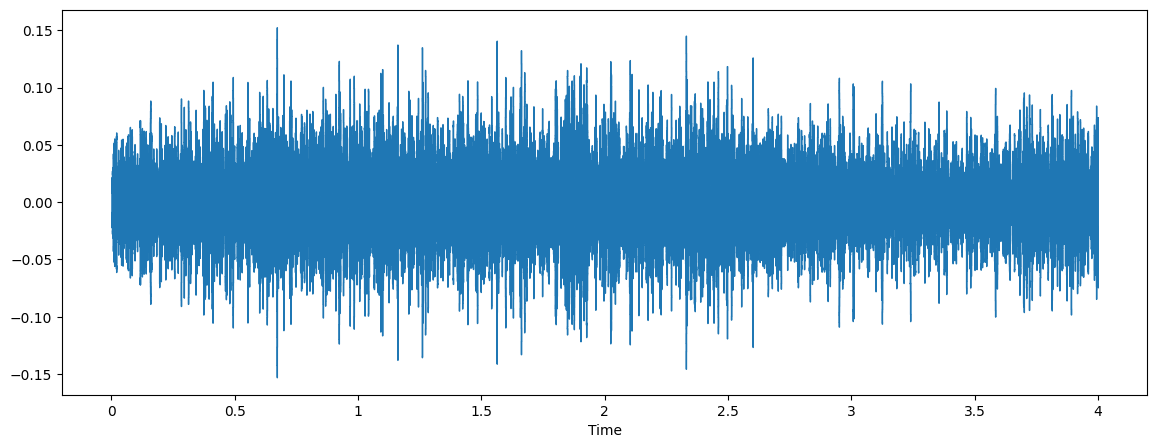

In [15]:
filename='random.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [24]:
wave_sample_rate, wave_audio=wav.read(filename)
wave_sample_rate

44100

In [25]:
wave_audio

array([[-501, -695],
       [-525, -765],
       [-609, -710],
       ...,
       [2090, 1544],
       [2024, 1730],
       [1997, 1753]], dtype=int16)

In [30]:
wd=os.getcwd()
wd
path=wd+'/UrbanSound8K/metadata'
os.chdir(path)

In [32]:
meta=pd.read_csv('UrbanSound8k.csv')

In [33]:
meta['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [38]:
test_audio=wd+'/UrbanSound8k/audio/fold1/14113-4-0-0.wav'
test_audio
librosa_audio_data,librosa_sample_rate=librosa.load(test_audio)

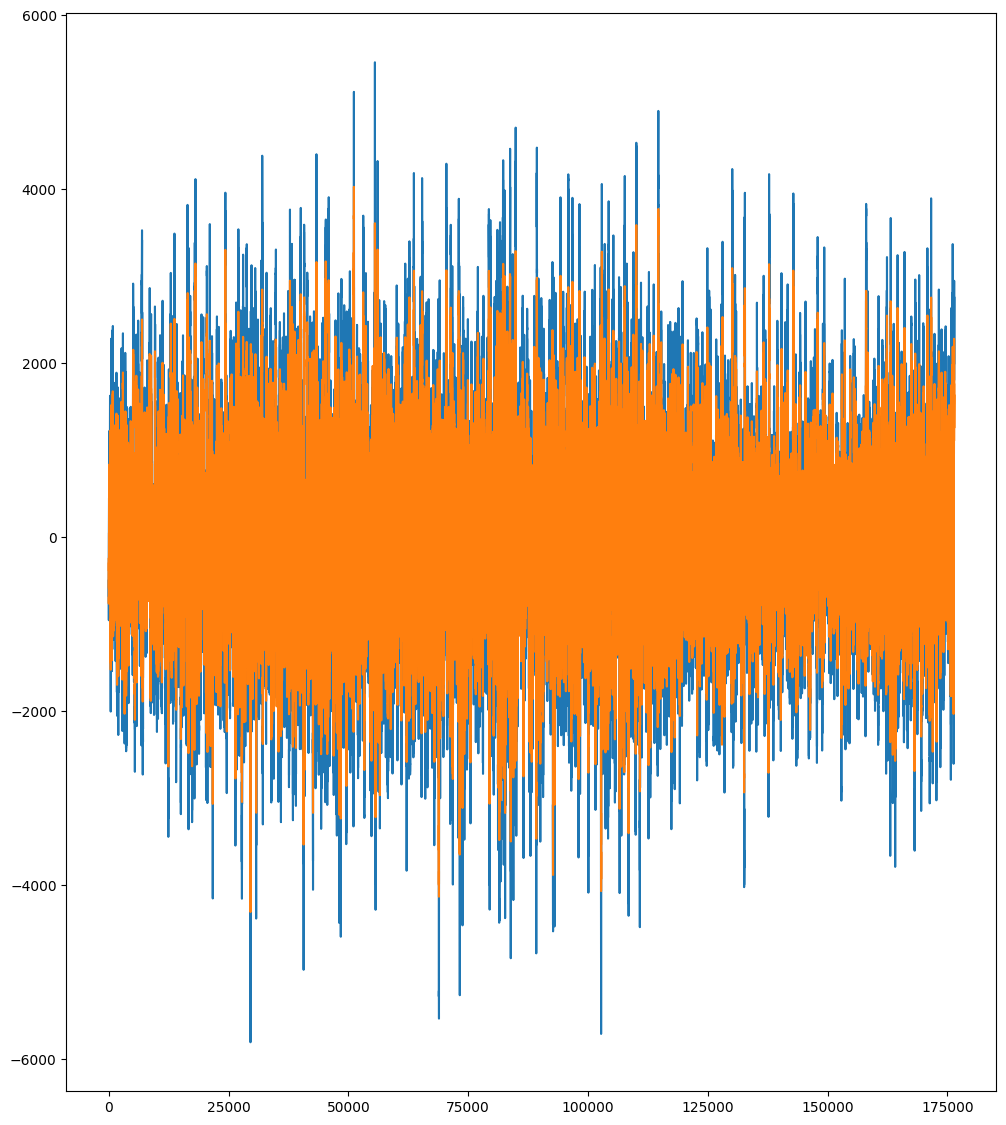

In [39]:
wave_audio
plt.figure(figsize=(12,14))
plt.plot(wave_audio)

In [40]:
#Create Indepedent Variables and get the features 

mfccs=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate)
print(mfccs.shape)

(20, 173)


In [41]:
mfccs

array([[-418.20755  , -400.03558  , -402.3668   , ..., -336.27975  ,
        -314.1584   , -312.0838   ],
       [  48.440628 ,   52.854248 ,   47.41223  , ...,   50.912205 ,
          48.22499  ,   42.67476  ],
       [ -18.611889 ,  -25.481781 ,  -36.240776 , ...,  -33.554787 ,
         -26.005087 ,  -18.427647 ],
       ...,
       [   7.5226545,    6.16226  ,    2.6988106, ...,    7.3123436,
          13.492207 ,   16.428783 ],
       [ -15.716032 ,  -14.014206 ,  -11.917076 , ...,    5.398917 ,
           3.6485996,   -4.0196924],
       [  -2.1430936,   -1.3685336,    4.5313816, ...,    8.353716 ,
          13.487254 ,   17.657991 ]], dtype=float32)

In [42]:
#import MFCCS for all the files 

import pandas as pd
import os 
import librosa 


In [76]:
os.chdir('/Users/suyashj/Downloads/Audio_Classification/UrbanSound8K')
print(os.getcwd())

/Users/suyashj/Downloads/Audio_Classification/UrbanSound8K


In [77]:
audio_dataset=os.getcwd()+'/audio'
print(audio_dataset)

/Users/suyashj/Downloads/Audio_Classification/UrbanSound8K/audio


In [78]:

meta_data=pd.read_csv(os.getcwd()+'/metadata/UrbanSound8k.csv')
meta_data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [79]:
#Create a MFCCS feature for every aduio file and then extract the feature by creating the Transpose
def feature_extracted(file):
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_feature=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_feature=np.mean(mfccs_feature.T,axis=0)
    
    return mfccs_scaled_feature

In [80]:
#Iterate thru all the data and have the data ready to have Mel-Frequencies for the data 

import numpy as np
from tqdm import tqdm

extracted_features=[]

for index_num, row in tqdm(meta_data.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    class_names=row["class"]
    data=feature_extracted(file_name)
    extracted_features.append([data,class_names])

3555it [01:36, 38.33it/s]/Users/suyashj/anaconda3/envs/tensorenv/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8321it [03:38, 48.47it/s]/Users/suyashj/anaconda3/envs/tensorenv/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/suyashj/anaconda3/envs/tensorenv/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [03:48, 38.30it/s]


In [81]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])

In [82]:
extracted_features_df

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing
...,...,...
8727,"[-398.5845, 135.53496, -50.725018, 35.855907, ...",car_horn
8728,"[-346.4742, 86.34815, -45.16858, 51.709873, -3...",car_horn
8729,"[-303.88824, 111.35945, -45.941566, 35.877018,...",car_horn
8730,"[-344.11008, 125.45021, -54.90344, 34.891148, ...",car_horn


In [90]:
x=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [117]:
x.shape

(8732, 40)

In [118]:
#Add dummy values and have the same dimensions for 'y'
y=np.array(pd.get_dummies(y))

ValueError: Data must be 1-dimensional, got ndarray of shape (8732, 10) instead

In [119]:
y_train.shape

(6985, 10)

In [120]:
#Splitting the data in Train/Test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [121]:
#Encoding Label
X_train.shape

(6985, 40)

In [122]:
X_test.shape

(1747, 40)

In [123]:
y_train.shape

(6985, 10)

In [124]:
y_test.shape

(1747, 10)

In [125]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics



In [128]:

num_labels=y.shape[1]
print(num_labels)

10


In [130]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [131]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               4100      
                                                                 
 activation_21 (Activation)  (None, 100)               0         
                                                                 
 dropout_18 (Dropout)        (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 200)               20200     
                                                                 
 activation_22 (Activation)  (None, 200)               0         
                                                                 
 dropout_19 (Dropout)        (None, 200)               0         
                                                                 
 dense_23 (Dense)            (None, 100)              

In [132]:
#Compile the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [133]:
#Fit and run the model and set the epochs
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
185/219 [========================>.....] - ETA: 0s - loss: 11.4955 - accuracy: 0.1230
Epoch 1: val_loss improved from inf to 2.29632, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 10.2066 - accuracy: 0.1234 - val_loss: 2.2963 - val_accuracy: 0.1156
Epoch 2/100
166/219 [=====================>........] - ETA: 0s - loss: 2.5904 - accuracy: 0.1201

/Users/suyashj/anaconda3/envs/tensorenv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.29632 to 2.28527, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.5463 - accuracy: 0.1236 - val_loss: 2.2853 - val_accuracy: 0.1070
Epoch 3/100
170/219 [======================>.......] - ETA: 0s - loss: 2.3341 - accuracy: 0.1307
Epoch 3: val_loss improved from 2.28527 to 2.27536, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.3306 - accuracy: 0.1297 - val_loss: 2.2754 - val_accuracy: 0.1128
Epoch 4/100
171/219 [======================>.......] - ETA: 0s - loss: 2.2823 - accuracy: 0.1429
Epoch 4: val_loss improved from 2.27536 to 2.20054, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 2.2759 - accuracy: 0.1433 - val_loss: 2.2005 - val_accuracy: 0.2089
Epoch 5/100
172/219 [======================>.......] - ETA: 0s - loss: 2.2432 - accuracy: 0

In [134]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.757870614528656


In [135]:
filename=os.getcwd()+"UrbanSound8K/random.wav"
prediction_feature=feature_extracted(filename)
prediction_feature=prediction_feature.reshape(1,-1)
y_pred = model.predict(prediction_feature)


1/1 [==============================] - 0s 40ms/step


In [136]:
y_pred

array([[0.00338327, 0.2614822 , 0.01958056, 0.03676895, 0.03704472,
        0.01255655, 0.00312787, 0.00209952, 0.0017431 , 0.62221324]],
      dtype=float32)